In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
from random import sample
import matplotlib.pyplot as plt


In [ ]:
#Description of features
#Average[3]: Average acceleration (for each axis)
#Standard Deviation[3]: Standard deviation (for each axis)
#Average Absolute Difference[3]: Average absolute
#difference between the value of each of the 200 readings
#within the ED and the mean value over those 200 values
#(for each axis)
#Average Resultant Acceleration[1]: Average of the square
#roots of the sum of the values of each axis squared
#over the ED
#Time Between Peaks[3]: Time in milliseconds between
#peaks in the sinusoidal waves associated with most
#activities (for each axis)
#Binned Distribution[30]: We determine the range of values
#for each axis (maximum – minimum), divide this range into
#10 equal sized bins, and then record what fraction of the
#200 values fell within each of the bins.

In [2]:
# Data of Anjani, Bhargavi and Surada for training the model
df_features = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile.csv")

df_features['color'] = Series([(0 if x == "walking" else 1) for x in df_features['Label']])
my_color_map = ListedColormap(['r','g'],'mycolormap')
# 0,red,walking
# 1,green,running

df_unique = df_features.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.describe()
print("Shape of training data", df_unique.shape)

X_train_data = df_unique.values[:, 2:45]
y_train_data = df_unique.values[:, 45]
usersList = set(df_unique.values[:,0])
# print("Users for training the model")
# print(usersList)

Shape of training data (406, 47)


In [78]:
# Data of 12 people for testing the model
df_features_test = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile_10.csv")

df_features_test['color'] = Series([(0 if x == "walking" else 1) for x in df_features_test['Label']])
my_color_map = ListedColormap(['r','g'],'mycolormap')
# 0,red,walking
# 1,green,running

df_unique_test = df_features_test.drop_duplicates(subset=['User', 'Timestamp'])
df_unique_test.head()
print("Shape of test data", df_unique_test.shape)

X_test = df_unique_test.values[:, 2:45]
y_test = df_unique_test.values[:, 45]
usersListSize = len(set(df_features_test.values[:,0]))

#Smaller data 
#Predicting using test data
#taking size of test data 10% of training data
test_small = df_unique_test.iloc[sample(range(len(df_unique_test)), 40), :]
X_test_small = test_small.values[:,2:45]
Y_test_small = test_small.values[:,45]

print("Users for testing the model")
print(usersListSize)

Shape of test data (415, 47)
Users for testing the model
12


In [85]:
# Fitting the logistic regression model
clf = LogisticRegression(C=0.01, random_state=1)
clf.fit(X_train_data, y_train_data)
lr_prob = clf.fit(X_train_data, y_train_data)

In [86]:
predict = clf.predict(X_test_small)
logisticRegScore = clf.score(X_test_small, Y_test_small)

plt.figure(1, figsize=(4, 3))
plt.clf()
print("Logistic regression Score")
print(logisticRegScore*100)
print("Coefficients of the features")
print(clf.coef_)
print(X_train_data.shape)

# Convert all the values to float 
float_array=np.array(X_train_data,dtype=np.float32)
feature_importance = np.std(float_array, 0)*np.absolute(clf.coef_)

np_column_list = np.array(df_unique.columns.tolist())
column_names = np_column_list[2:45,]

# featureimp_list = feature_importance.split(" ")
# print("List= ", featureimp_list)
print("Column Names=", column_names)
print("Feature importance=", feature_importance)
print(np.sort(feature_importance))

# TimeDiff-X
# StdDev-x
# TimeDiffPeaks-y

Logistic regression Score
85.0
Coefficients of the features
[[ -6.97e-04  -3.10e-03  -5.46e-03  -3.68e-03   2.41e-03   6.92e-03
    9.30e-04  -7.65e-03  -9.62e-03  -4.21e-03  -1.97e-03  -6.75e-03
   -7.93e-03  -4.63e-03  -2.55e-03  -4.71e-03  -1.54e-03   1.16e-03
    1.54e-03   1.46e-03  -8.82e-04  -7.07e-04  -3.10e-03  -7.48e-03
   -8.12e-03  -6.55e-03  -2.04e-03   2.24e-03   1.89e-03  -2.51e-04
   -8.75e-02   5.63e-02   1.09e-01  -3.09e-01  -2.24e-01  -2.42e-01
    8.20e-02   1.63e-01  -3.09e-01  -3.55e-01  -2.70e-01  -3.04e-01
   -1.68e-02]]
(406, 43)
Column Names= ['Bin1,x' 'Bin2,x' 'Bin3,x' 'Bin4,x' 'Bin5,x' 'Bin6,x' 'Bin7,x' 'Bin8,x'
 'Bin9,x' 'Bin10,x' 'Bin1,y' 'Bin2,y' 'Bin3,y' 'Bin4,y' 'Bin5,y' 'Bin6,y'
 'Bin7,y' 'Bin8,y' 'Bin9,y' 'Bin10,y' 'Bin1,z' 'Bin2,z' 'Bin3,z' 'Bin4,z'
 'Bin5,z' 'Bin6,z' 'Bin7,z' 'Bin8,z' 'Bin9,z' 'Bin10,z' 'TimeDiffPeaks-x'
 'TimeDiffPeaks-y' 'TimeDiffPeaks-z' 'AvgAbsDiff-x' 'AvgAbsDiff-y'
 'AvgAbsDiff-z' 'AvgAcc-x' 'AvgAcc-y' 'AvgAcc-z' 'StdDev-x' 'St

In [87]:
# Confusion matrix analysis
cm = confusion_matrix(Y_test_small, predict)
print(cm)

[[15  2]
 [ 4 19]]


Confusion matrix, without normalization
[[15  2]
 [ 4 19]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.17  0.83]]


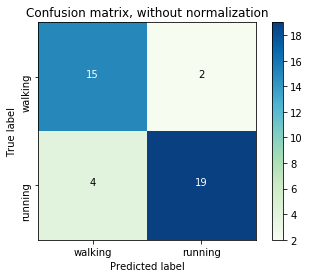

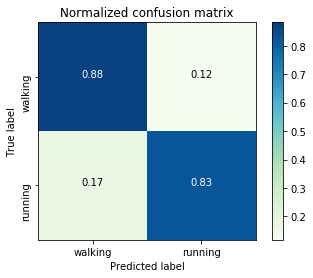

In [88]:
#Confusion matrix plot
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_small, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')
plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr', dpi=1000)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr_normalized', dpi=1000)
plt.show()


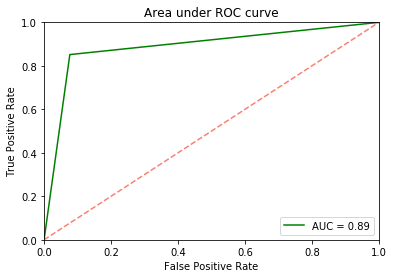

In [74]:
#Area under ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# # Encode the labels for ROC plot
def encode_label(y_test):
    y_test_binary = []
    for y in y_test:
        if y == "walking":
            y_test_binary.append(1)
        else:
            y_test_binary.append(0)
    return y_test_binary

y_test_binary = encode_label(Y_test_small)
y_predict_binary = encode_label(predict)

probas_ = lr_prob.predict_proba(X_test_small)
# print(probas_)

# Compute fpr, tpr, thresholds and roc auc
# fpr, tpr, thresholds = roc_curve(y_test_binary, probas_[:, 1])
fpr, tpr, thresholds = roc_curve(y_test_binary, y_predict_binary)
roc_auc = auc(fpr, tpr)

# # Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc, color="green")
# plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold (AUC = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], 'k--', color="salmon")  # random predictions curve, 50% accuracy
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under ROC curve')
plt.legend(loc="lower right")
# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/roc_lr', dpi=200)
plt.show()


[[  8.62e-01   1.38e-01]
 [  6.09e-02   9.39e-01]
 [  8.87e-01   1.13e-01]
 [  9.79e-02   9.02e-01]
 [  3.73e-02   9.63e-01]
 [  1.00e+00   3.22e-06]
 [  9.69e-01   3.14e-02]
 [  5.87e-01   4.13e-01]
 [  1.79e-01   8.21e-01]
 [  1.43e-01   8.57e-01]
 [  5.11e-01   4.89e-01]
 [  5.40e-01   4.60e-01]
 [  9.79e-01   2.06e-02]
 [  4.32e-01   5.68e-01]
 [  4.20e-02   9.58e-01]
 [  1.00e+00   2.77e-08]
 [  7.54e-01   2.46e-01]
 [  8.98e-01   1.02e-01]
 [  1.05e-01   8.95e-01]
 [  2.15e-01   7.85e-01]
 [  2.60e-01   7.40e-01]
 [  1.17e-01   8.83e-01]
 [  3.08e-01   6.92e-01]
 [  1.65e-02   9.84e-01]
 [  1.82e-01   8.18e-01]
 [  6.08e-03   9.94e-01]
 [  9.97e-01   2.58e-03]
 [  8.24e-01   1.76e-01]
 [  9.99e-01   6.06e-04]
 [  1.84e-01   8.16e-01]
 [  3.99e-01   6.01e-01]
 [  9.98e-01   1.88e-03]
 [  7.32e-01   2.68e-01]
 [  4.02e-01   5.98e-01]
 [  1.88e-01   8.12e-01]
 [  9.97e-01   3.12e-03]
 [  1.11e-01   8.89e-01]
 [  3.40e-01   6.60e-01]
 [  8.80e-01   1.20e-01]
 [  1.00e+00   2.61e-04]]

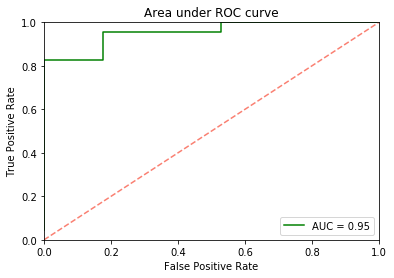

In [89]:
#Area under ROC with predict probas
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

y_test_binary = encode_label(Y_test_small)
# y_predict_binary = encode_label(predict)

probas_ = lr_prob.predict_proba(X_test_small)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test_binary, probas_[:, 1])
roc_auc = auc(fpr, tpr)

print(probas_)
# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc, color="green")
# plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold (AUC = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], 'k--', color="salmon")  # random predictions curve, 50% accuracy
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under ROC curve')
plt.legend(loc="lower right")
plt.show()

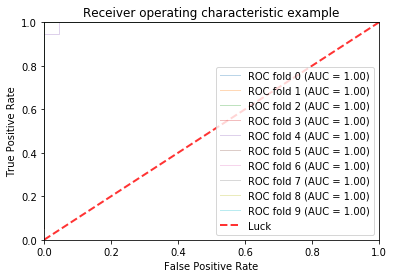

In [91]:
X = df_unique.values[:,2:45]
y = df_unique.values[:,45]

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)

j = 0
for train, test in cv.split(X, y):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    
    num_labels = []
    for i in range(0,len(y[test])):
        if y[test][i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    labels = np.array(num_labels)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(labels, probas_[:, 0])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (j, roc_auc))
    j += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()